In [1]:
import os
import pandas as pd
import numpy as np
import sys
import pickle
from tqdm import tqdm

array([[<AxesSubplot: title={'center': 'expert.engagement.challenge'}>,
        <AxesSubplot: title={'center': 'novice.engagement.challenge'}>]],
      dtype=object)

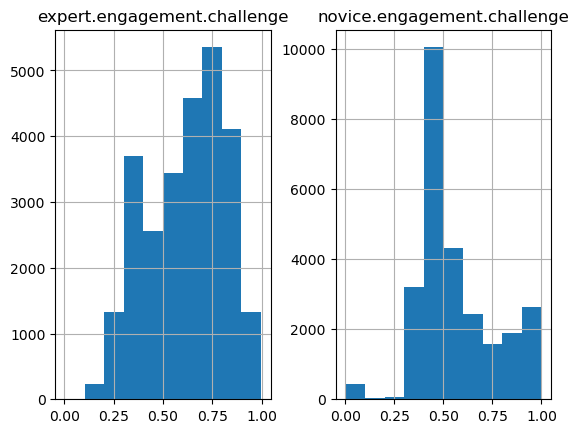

In [2]:
data_folder = '../data/aria-noxi'
csv_list = '../data/sample_list.csv'
sample_list = pd.read_csv(os.path.join(csv_list)).iloc[:,1].values
# print(self.sample_list)

# debug
# pd.set_option('display.max_columns', None)
lens_list = []


data = []
item = sample_list[0]
df = pd.read_csv(os.path.join(data_folder, item, 'engagement.csv'), sep=';')
df[['expert.engagement.challenge','novice.engagement.challenge']].hist(bins=10)

array([[<AxesSubplot: title={'center': 'expert.engagement.gold'}>,
        <AxesSubplot: title={'center': 'novice.engagement.gold'}>]],
      dtype=object)

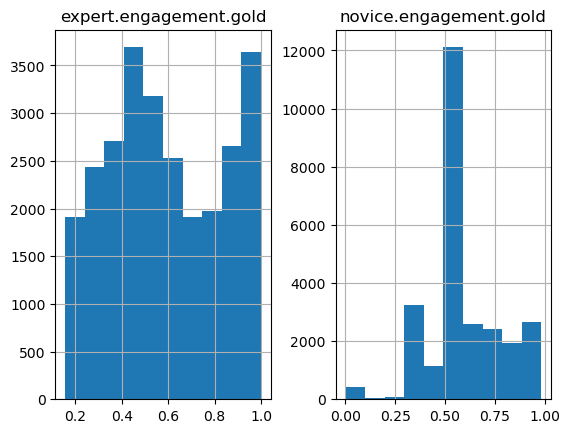

In [3]:
item = sample_list[0]
df = pd.read_csv(os.path.join(data_folder, item, 'engagement.csv'), sep=';')
df[['expert.engagement.gold','novice.engagement.gold']].hist(bins=10)

array([[<AxesSubplot: title={'center': 'expert.engagement.gold'}>,
        <AxesSubplot: title={'center': 'novice.engagement.gold'}>]],
      dtype=object)

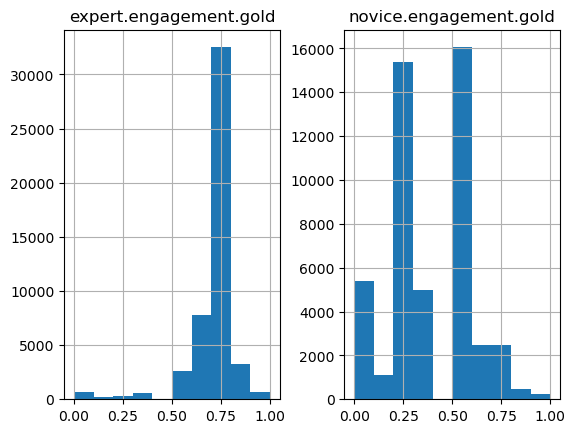

In [4]:
item = sample_list[1]
df = pd.read_csv(os.path.join(data_folder, item, 'engagement.csv'), sep=';')
df[['expert.engagement.gold','novice.engagement.gold']].hist(bins=10)

array([[<AxesSubplot: title={'center': 'expert.engagement.challenge'}>,
        <AxesSubplot: title={'center': 'novice.engagement.challenge'}>]],
      dtype=object)

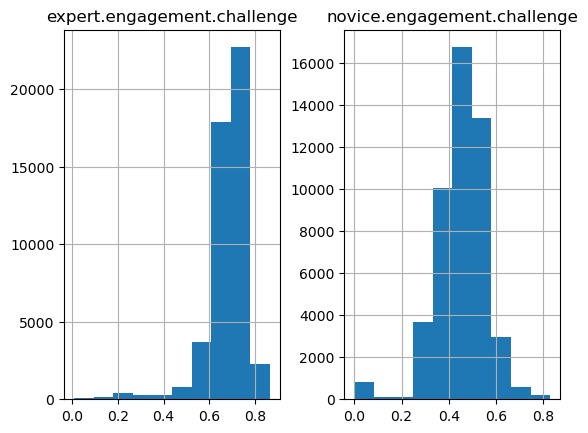

In [5]:
item = sample_list[1]
df = pd.read_csv(os.path.join(data_folder, item, 'engagement.csv'), sep=';')
df[['expert.engagement.challenge','novice.engagement.challenge']].hist(bins=10)

In [6]:
# Specify column names
column_names = ['Expert', 'Novice']

# Create an empty DataFrame with specified column names
df_all = pd.DataFrame(columns=column_names)

data_folder = '../data/aria-noxi'
csv_list = '../data/sample_list.csv'
sample_list = pd.read_csv(os.path.join(csv_list)).iloc[:,1].values
# print(self.sample_list)

# debug
# pd.set_option('display.max_columns', None)
lens_list = []


data = []
count = 0
tmpe = np.empty((0,))
tmpn = np.empty((0,))
for item in tqdm(sample_list, desc='Formating engagement label', leave=True):
    df = pd.read_csv(os.path.join(data_folder, item, 'engagement.csv'), sep=';')

    # expert.engagement.challenge
    # expert.engagement.gold
    # select 'challenge gold' annotation first, if not exists 'gold' instead
    if 'expert.engagement.challenge' in df.columns:
        exp = df['expert.engagement.challenge']
        nov = df['novice.engagement.challenge']
    elif 'expert.engagement.gold' in df.columns:
        exp = df['expert.engagement.gold']
        nov = df['novice.engagement.gold']
    else:
        raise CustomError("No label selected")
    tmpe = np.concatenate((tmpe, exp.values), axis=0)
    tmpn = np.concatenate((tmpn, nov.values), axis=0)
    # print(exp.values.shape)
    # print(tmpe.shape)
    # break



Formating engagement label: 100%|██████████| 81/81 [00:05<00:00, 14.97it/s]


array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

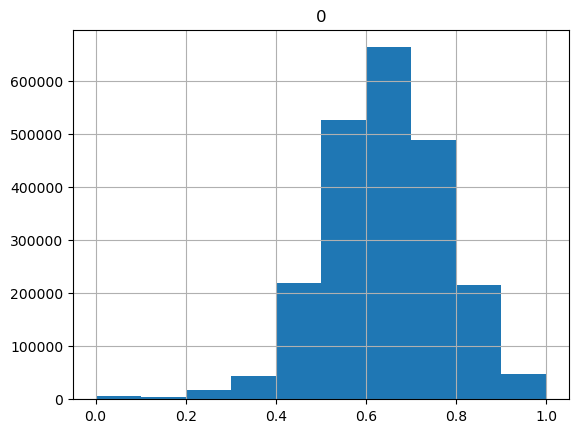

In [7]:
df = pd.DataFrame(tmpe)
df.hist(bins=10)

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

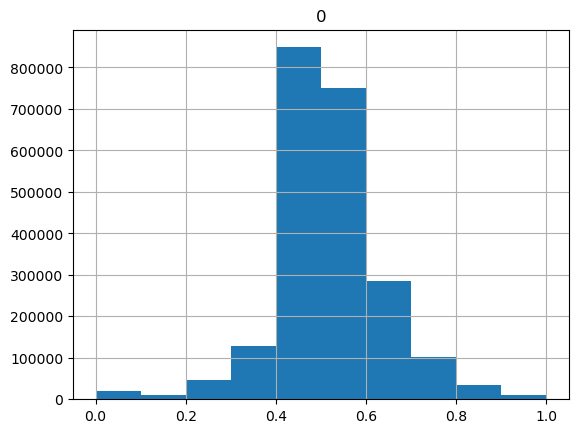

In [8]:
df = pd.DataFrame(tmpn)
df.hist(bins=10)

In [9]:
# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

# Calculate correlation coefficient using numpy.corrcoef
correlation_matrix = np.corrcoef(x, y)

# Extract the correlation coefficient between x and y
correlation_coefficient = correlation_matrix[0, 1]

print(f"Pearson Correlation Coefficient between x and y: {correlation_matrix}")

Pearson Correlation Coefficient between x and y: [[1. 1.]
 [1. 1.]]


In [10]:
import pickle
with open('../data/openface.pkl', 'rb') as file:
    data_pickle = pickle.load(file)

with open('../data/label.pkl', 'rb') as file:
    label_pickle = pickle.load(file)

In [19]:
def avg_corrcoef(arr2d1, arr2d2):
    t, l = arr2d1.shape
    tl_ce = 0
    for i in range(l):
        m = np.corrcoef(arr2d1[:,i], arr2d2[:,i])
        tl_ce += m[0,1]
    if np.isnan(tl_ce):
        tl_ce = 0
    return tl_ce/l
def avg_cov(arr2d1, arr2d2):
    t, l = arr2d1.shape
    tl_cov = 0
    for i in range(l):
        m = np.cov(arr2d1[:,i], arr2d2[:,i])
        tl_cov += m[0,1]
    # if np.isnan(tl_ce):
    #     tl_ce = 0
    return tl_cov/l

In [43]:
def cal_co(idx = 0, feature = 'face'):   
    # idx = 5
    item = sample_list[idx]
    df = pd.read_csv(os.path.join(data_folder, item, 'engagement.csv'), sep=';')
    fe = data_pickle[idx][0][feature]
    fe = fe.reshape(fe.shape[0],-1)
    fn = data_pickle[idx][1][feature]
    fn = fn.reshape(fn.shape[0],-1)
    le = label_pickle[idx][0]
    fe.shape

    ce_high = []
    ce_low = []
    sample_high = []
    sample_low = []
    treshold = 0.2
    for i in range(le.shape[0]):
        if i < 250+25*30:
            continue
        elif i+1+25*10 == le.shape[0]:
            break

        f1 = fe[i-249:i+1,:]
        f2 = fn[i-249:i+1,:]
        # print(f1.shape)
        # print(f1)
        if(le[i]>1-treshold):
            # ce = avg_corrcoef(f1, f2)
            ce = avg_cov(f1, f2)
            # print(ce)
            if np.isnan(ce):
                ce_high.append(0)
                continue
            ce_high.append(ce)
        if(le[i]<treshold):
            ce = avg_corrcoef(f1, f2)
            # ce = avg_cov(f1,f2)
            
            if np.isnan(ce):
                ce_low.append(0)
                continue
            ce_low.append(ce)
        
        # break
    print(f'length of high engagement{len(ce_high)}, length of low engagement {len(ce_low)}')

    r1 = sum(ce_high)/len(ce_high) if len(ce_high)>0 else 0
    r2 = sum(ce_low)/len(ce_low) if len(ce_low) > 0 else 0
    return (r1, r2)
        

In [35]:
res = []
for i in range(81):
    res.append(cal_co(i, feature = 'face'))

/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement5241, length of low engagement 199


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement1010, length of low engagement 148


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement3187, length of low engagement 234
length of high engagement5823, length of low engagement 0
length of high engagement15782, length of low engagement 0
length of high engagement13403, length of low engagement 0
length of high engagement27167, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement11386, length of low engagement 19
length of high engagement0, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement4968, length of low engagement 307


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement13544, length of low engagement 63
length of high engagement4716, length of low engagement 0
length of high engagement6666, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement1081, length of low engagement 73


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement484, length of low engagement 298
length of high engagement34, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement1043, length of low engagement 89
length of high engagement3510, length of low engagement 0
length of high engagement0, length of low engagement 0
length of high engagement1126, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement2787, length of low engagement 149
length of high engagement155, length of low engagement 0
length of high engagement1566, length of low engagement 0
length of high engagement98, length of low engagement 0
length of high engagement3541, length of low engagement 0
length of high engagement2048, length of low engagement 0
length of high engagement3704, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement919, length of low engagement 102


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement1292, length of low engagement 209
length of high engagement840, length of low engagement 0
length of high engagement2543, length of low engagement 4
length of high engagement0, length of low engagement 0
length of high engagement82, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement1280, length of low engagement 35
length of high engagement155, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement300, length of low engagement 614


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement2331, length of low engagement 259
length of high engagement1405, length of low engagement 0
length of high engagement1275, length of low engagement 0
length of high engagement8071, length of low engagement 0
length of high engagement590, length of low engagement 0
length of high engagement457, length of low engagement 223
length of high engagement16, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement3017, length of low engagement 264
length of high engagement19973, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement7583, length of low engagement 177
length of high engagement6766, length of low engagement 0
length of high engagement273, length of low engagement 0
length of high engagement1806, length of low engagement 0
length of high engagement1149, length of low engagement 0
length of high engagement57, length of low engagement 0
length of high engagement1132, length of low engagement 0
length of high engagement0, length of low engagement 134
length of high engagement705, length of low engagement 0
length of high engagement0, length of low engagement 0
length of high engagement4078, length of low engagement 86
length of high engagement2450, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement0, length of low engagement 53


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement682, length of low engagement 376
length of high engagement0, length of low engagement 0
length of high engagement12, length of low engagement 0
length of high engagement0, length of low engagement 121


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement2073, length of low engagement 104
length of high engagement0, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement12, length of low engagement 179


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement2698, length of low engagement 512
length of high engagement1334, length of low engagement 0
length of high engagement3743, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement5156, length of low engagement 256
length of high engagement10796, length of low engagement 0
length of high engagement986, length of low engagement 0
length of high engagement2965, length of low engagement 0
length of high engagement209, length of low engagement 0
length of high engagement1163, length of low engagement 0
length of high engagement929, length of low engagement 0
length of high engagement67, length of low engagement 0
length of high engagement915, length of low engagement 0
length of high engagement937, length of low engagement 0
length of high engagement798, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement320, length of low engagement 83
length of high engagement21851, length of low engagement 0


In [44]:
ares = []
for i in range(81):
    ares.append(cal_co(i, feature= 'aus'))

/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement5241, length of low engagement 199


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement1010, length of low engagement 148


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement3187, length of low engagement 234
length of high engagement5823, length of low engagement 0
length of high engagement15782, length of low engagement 0
length of high engagement13403, length of low engagement 0
length of high engagement27167, length of low engagement 0
length of high engagement11386, length of low engagement 19
length of high engagement0, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement4968, length of low engagement 307


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement13544, length of low engagement 63
length of high engagement4716, length of low engagement 0
length of high engagement6666, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement1081, length of low engagement 73


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement484, length of low engagement 298
length of high engagement34, length of low engagement 0
length of high engagement1043, length of low engagement 89
length of high engagement3510, length of low engagement 0
length of high engagement0, length of low engagement 0
length of high engagement1126, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement2787, length of low engagement 149
length of high engagement155, length of low engagement 0
length of high engagement1566, length of low engagement 0
length of high engagement98, length of low engagement 0
length of high engagement3541, length of low engagement 0
length of high engagement2048, length of low engagement 0
length of high engagement3704, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement919, length of low engagement 102


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement1292, length of low engagement 209
length of high engagement840, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement2543, length of low engagement 4
length of high engagement0, length of low engagement 0
length of high engagement82, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement1280, length of low engagement 35
length of high engagement155, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement300, length of low engagement 614


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement2331, length of low engagement 259
length of high engagement1405, length of low engagement 0
length of high engagement1275, length of low engagement 0
length of high engagement8071, length of low engagement 0
length of high engagement590, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement457, length of low engagement 223
length of high engagement16, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement3017, length of low engagement 264
length of high engagement19973, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement7583, length of low engagement 177
length of high engagement6766, length of low engagement 0
length of high engagement273, length of low engagement 0
length of high engagement1806, length of low engagement 0
length of high engagement1149, length of low engagement 0
length of high engagement57, length of low engagement 0
length of high engagement1132, length of low engagement 0
length of high engagement0, length of low engagement 134


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement705, length of low engagement 0
length of high engagement0, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement4078, length of low engagement 86
length of high engagement2450, length of low engagement 0
length of high engagement0, length of low engagement 53


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement682, length of low engagement 376
length of high engagement0, length of low engagement 0
length of high engagement12, length of low engagement 0
length of high engagement0, length of low engagement 121
length of high engagement2073, length of low engagement 104
length of high engagement0, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement12, length of low engagement 179


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement2698, length of low engagement 512
length of high engagement1334, length of low engagement 0
length of high engagement3743, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement5156, length of low engagement 256
length of high engagement10796, length of low engagement 0
length of high engagement986, length of low engagement 0
length of high engagement2965, length of low engagement 0
length of high engagement209, length of low engagement 0
length of high engagement1163, length of low engagement 0
length of high engagement929, length of low engagement 0
length of high engagement67, length of low engagement 0
length of high engagement915, length of low engagement 0
length of high engagement937, length of low engagement 0
length of high engagement798, length of low engagement 0


/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/s2020425/conda/x64/envs/torch1/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


length of high engagement320, length of low engagement 83
length of high engagement21851, length of low engagement 0


In [52]:
idx = 8
feature = 'aus'
item = sample_list[idx]
df = pd.read_csv(os.path.join(data_folder, item, 'engagement.csv'), sep=';')
fe = data_pickle[idx][0][feature]
fe = fe.reshape(fe.shape[0],-1)
fn = data_pickle[idx][1][feature]
fn = fn.reshape(fn.shape[0],-1)
le = label_pickle[idx][0]
fe.shape

ce_high = []
ce_low = []
sample_high = []
sample_low = []
treshold = 0.2
for i in range(le.shape[0]):
    if i < 250+25*30:
        continue
    elif i+1+25*10 == le.shape[0]:
        break

    f1 = fe[i-249:i+1,:]
    f2 = fn[i-249:i+1,:]
    # print(f1.shape)
    # print(f1)
    ce = 0
    if(le[i]>1-treshold):
        # ce = avg_corrcoef(f1, f2)
        ce = avg_cov(f1, f2)
        print('high')
        # print(ce)
        if np.isnan(ce):
            ce_high.append(0)
            continue
        ce_high.append(ce)
    if(le[i]<treshold):
        ce = avg_corrcoef(f1, f2)
        # ce = avg_cov(f1,f2)
        
        print('low')
        
        if np.isnan(ce):
            ce_low.append(0)
            continue
        ce_low.append(ce)
    if ce != 0:
        print(ce)
    # break
print(f'length of high engagement{len(ce_high)}, length of low engagement {len(ce_low)}')

r1 = sum(ce_high)/len(ce_high) if len(ce_high)>0 else 0
r2 = sum(ce_low)/len(ce_low) if len(ce_low) > 0 else 0

length of high engagement0, length of low engagement 0


In [48]:
res

[(6.770097537476533e-06, -0.003632183683458336),
 (-2.27339853127735e-05, 0.0),
 (2.8426470511262962e-06, 0.050971671431508034),
 (5.7633312224404244e-06, 0),
 (-9.192217359573202e-06, 0),
 (-1.585111189703493e-05, 0),
 (1.2601479232319322e-05, 0),
 (-1.5928953186062978e-05, 0.012672818039244846),
 (0, 0),
 (2.5119188358784744e-05, 0.0),
 (-3.904924773567624e-06, 0.0),
 (-3.8608651290560945e-05, 0),
 (3.365286670728219e-05, 0),
 (-6.929494468561621e-05, 0.0),
 (-1.6960721204750898e-06, 0.0011611488902128373),
 (1.5472944712830564e-05, 0),
 (-2.6923364188148524e-05, 0.09990846722568715),
 (-8.195146225956545e-07, 0),
 (0, 0),
 (1.6086275528281778e-05, 0),
 (-3.703815369531017e-05, 0.018845824557261904),
 (-4.04006688575326e-05, 0),
 (7.572683342192602e-05, 0),
 (0.000713606069158627, 0),
 (-6.925027522995324e-06, 0),
 (1.887688107415474e-05, 0),
 (1.711212246709139e-05, 0),
 (6.4755717172819655e-06, 0.0258753103246258),
 (7.54783787137715e-06, 0.0),
 (-1.4560784496266572e-05, 0),
 (5.44

In [47]:
ares

[(8.306233894569028e-05, -0.009698701757770508),
 (0.00013117485741124082, -0.02146553042995757),
 (0.00016763173283028575, 0.008868429524078673),
 (0.00011349666607718477, 0),
 (0.00029706173098042646, 0),
 (0.00041977991140331453, 0),
 (0.0002346020351314392, 0),
 (0.00010678820771692971, 0.07749373927005661),
 (0, 0),
 (3.447910540333152e-06, 0.008639437434394683),
 (0.0003071239170115711, 0.0),
 (0.00026539388963768074, 0),
 (0.00048793083802384625, 0),
 (-0.00018779185924084862, 0.0311323656976554),
 (0.00036826607794327506, 0.031033521629049578),
 (0.00012843583996887198, 0),
 (-6.517184640156676e-05, 0.0394820060689003),
 (0.00019960168229465533, 0),
 (0, 0),
 (-0.0001578027960065104, 0),
 (3.896238216870523e-05, 0.08632632918399513),
 (-0.0004710410969052679, 0),
 (0.0003830556927914496, 0),
 (0.001638872997835279, 0),
 (0.0006620060974632615, 0),
 (0.0004070487870969171, 0),
 (0.0002541304532881876, 0),
 (-7.620886614344459e-05, 0.08619859852759537),
 (2.322547809888246e-06, 0

array([[<AxesSubplot: title={'center': 'expert.engagement.challenge'}>,
        <AxesSubplot: title={'center': 'novice.engagement.challenge'}>]],
      dtype=object)

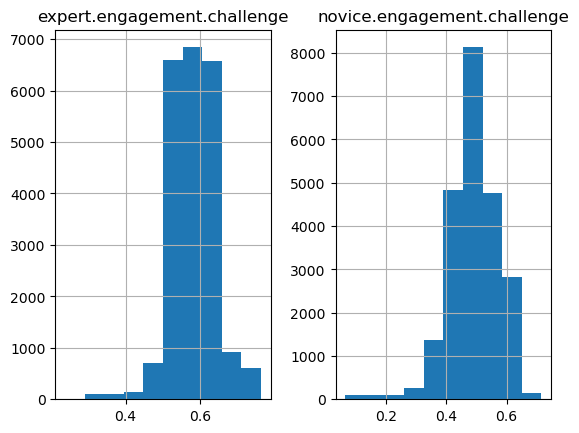

In [45]:
item = sample_list[8]
df = pd.read_csv(os.path.join(data_folder, item, 'engagement.csv'), sep=';')
df[['expert.engagement.challenge','novice.engagement.challenge']].hist(bins=10)